# DIABETES

OBJETIVO: Es limpiar, explorar, implementar y evaluar modelos de clasificación. La variable a predecir es OUTCOME.

## 1- Exploracion inicial y Limpieza

In [285]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [286]:
# Descargar el dataset
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

# Obtener el nombre del archivo directamente (primer archivo del directorio)
dataset_file = os.listdir(path)[0]

# Crear la ruta completa al archivo
dataset_path = os.path.join(path, dataset_file)

# Cargar el archivo como un DataFrame
df = pd.read_csv(dataset_path)  # Si es CSV
# df = pd.read_excel(dataset_path)  # Si es Excel

In [287]:
# Ver el tamaño y forma del dataframe
df.shape  # Muestra la cantidad de filas y columnas en el dataframe.

(768, 9)

In [288]:
# Primeras filas del dataframe
df.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [289]:
# Ultimas filas del dataframe
df.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1
767,1,93,70,31,0,30.40,0.32,23,0


In [290]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todas las columnas son numéricas

In [291]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()  # Calcula estadísticas básicas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [292]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No se tienen datos nulos

In [293]:
# Identificación de valores duplicados
df.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.

np.int64(0)

No hay datos duplicados

In [294]:
# Distribución de tipos de datos
df.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).

int64      7
float64    2
Name: count, dtype: int64

## Exploración detallada

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

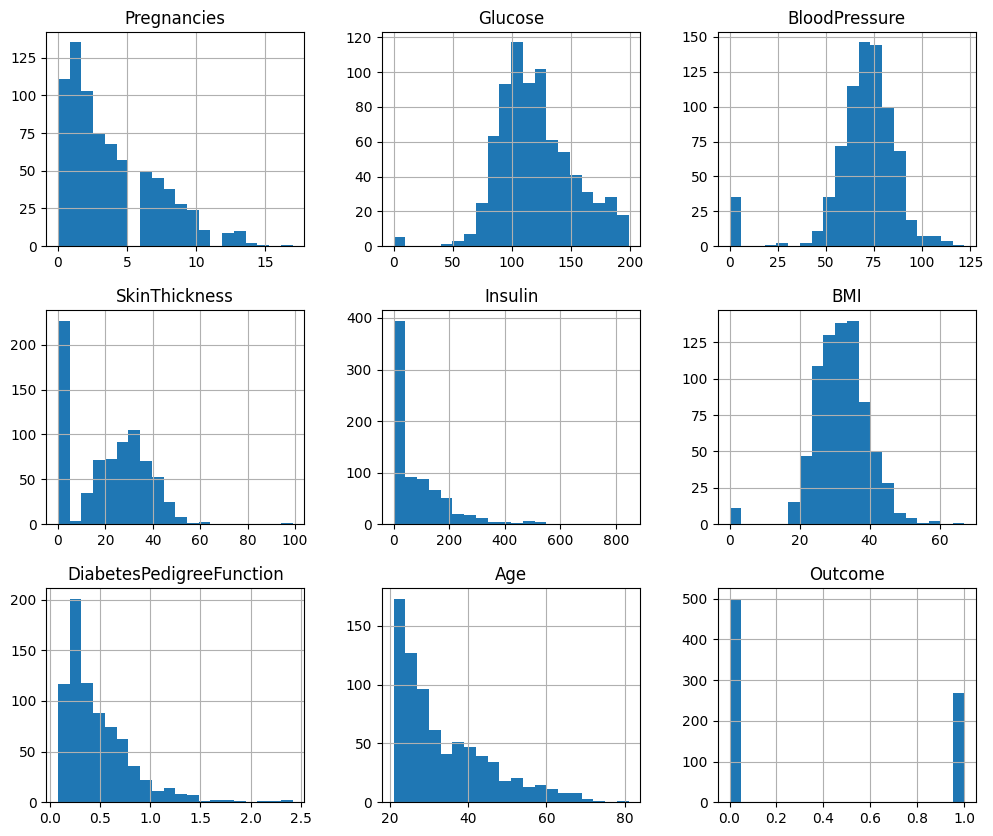

In [295]:
# Visualización de distribuciones numéricas
df.hist(figsize=(12, 10), bins=20)  # Crea histogramas para todas las columnas numéricas.

Se observa:

- Hay muchas mujeres con 0 o pocos embarazos, pero a pesar de eso igual hay pocos casos con muchos embarazos superando incluso los 15 embarazos.
- La mayoría ronda entre los 90 y 120 de glucosa, entre 60 y 80 de BloodPressure, entre 21 y 41 de BMI.
- La mayoría también tienen entre 20 y 30 años.

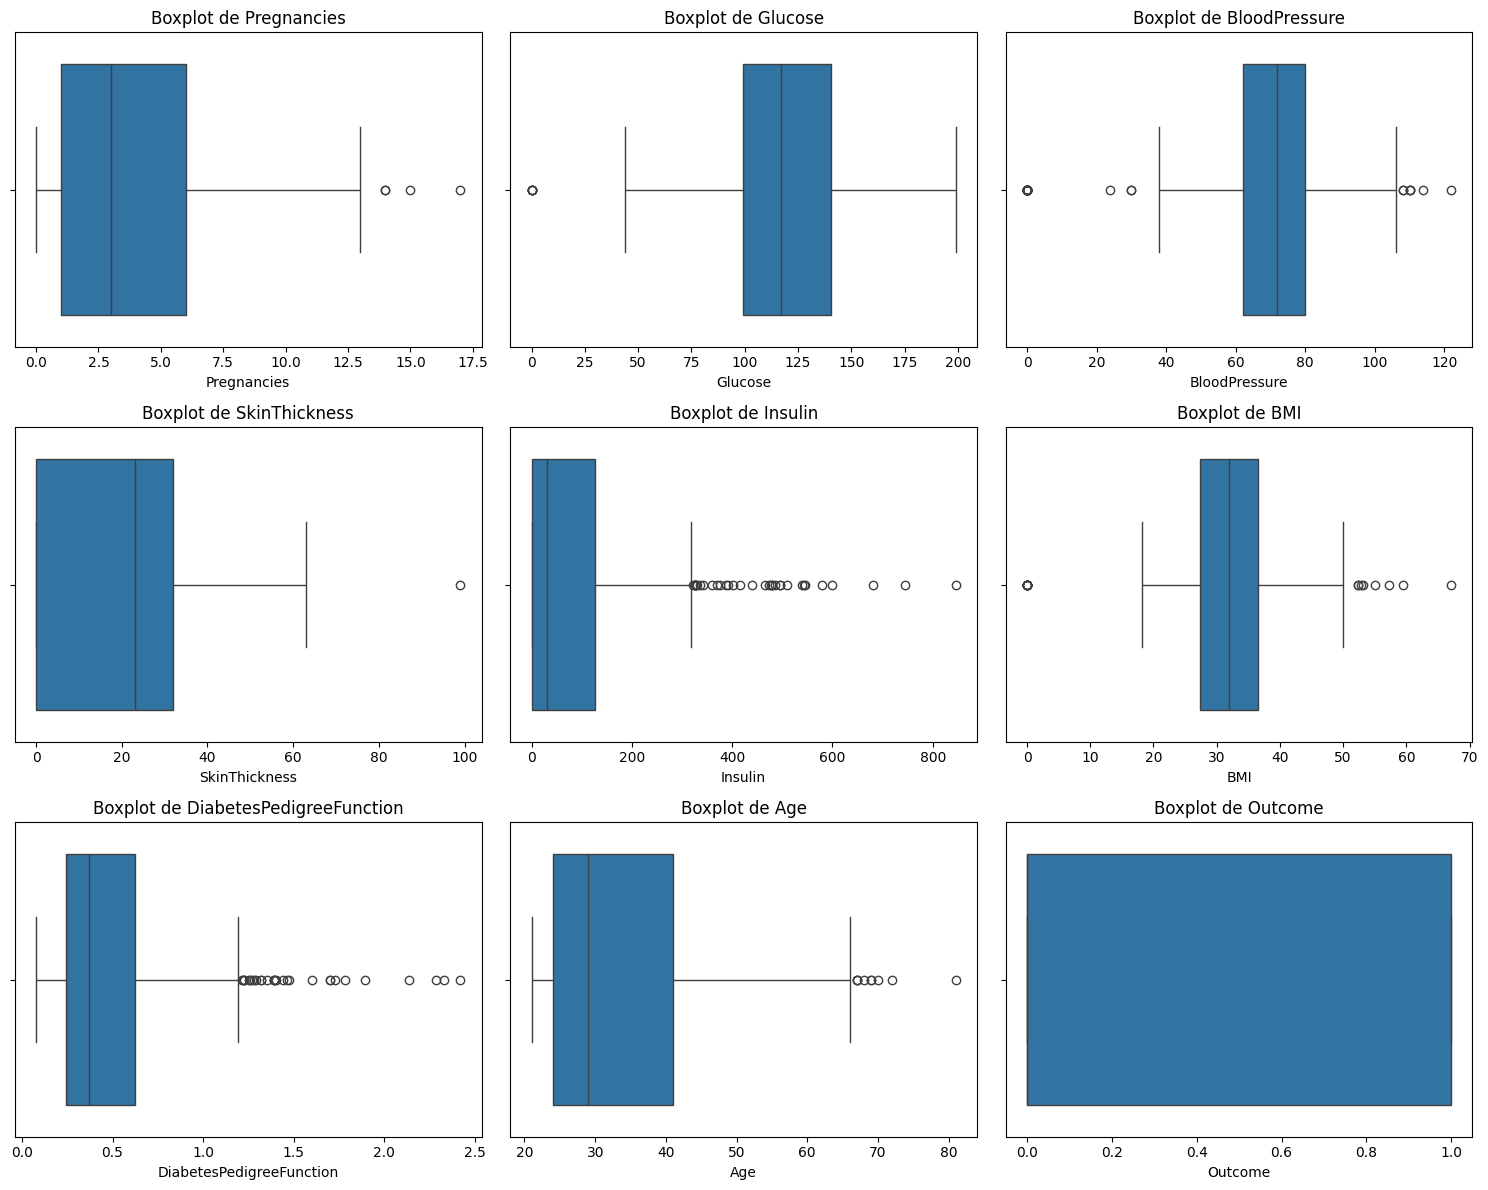

In [296]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [297]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")


Pregnancies - Número de outliers: 4

Glucose - Número de outliers: 5

BloodPressure - Número de outliers: 45

SkinThickness - Número de outliers: 1

Insulin - Número de outliers: 34

BMI - Número de outliers: 19

DiabetesPedigreeFunction - Número de outliers: 29

Age - Número de outliers: 9

Outcome - Número de outliers: 0


En todas las variables a excepción del Outcome, se observan outliers, los mayores en BloodPresssure y Insulin.

In [298]:
# Eliminar los outliers de todas las columnas numéricas
def eliminar_outliers_todas_columnas(df):
    # Copiar el DataFrame original para mantener el original sin cambios
    df_sin_outliers = df.copy()
    
    # Seleccionar las columnas numéricas
    columnas_numericas = df_sin_outliers.select_dtypes(include=['float64', 'int64']).columns
    
    # Crear un DataFrame booleano para identificar filas con valores dentro de los límites de outliers
    condiciones = pd.DataFrame(True, index=df_sin_outliers.index, columns=columnas_numericas)
    
    # Iterar sobre cada columna numérica
    for columna in columnas_numericas:
        # Calcular el primer y tercer cuartil, y el rango intercuartil (IQR)
        Q1 = df_sin_outliers[columna].quantile(0.25)
        Q3 = df_sin_outliers[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites inferior y superior para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Actualizar la condición para la columna actual
        condiciones[columna] = (df_sin_outliers[columna] >= lower_bound) & (df_sin_outliers[columna] <= upper_bound)
    
    # Combinar todas las condiciones para filtrar las filas sin outliers
    df_sin_outliers = df_sin_outliers[condiciones.all(axis=1)]
    
    return df_sin_outliers


# Ejecutar la función para obtener el DataFrame sin outliers en todas las columnas numéricas
df_sin_outliers = eliminar_outliers_todas_columnas(df)

# Verificar la cantidad de filas antes y después de la limpieza
print(f"DataFrame original: {df.shape}")
print(f"DataFrame sin outliers: {df_sin_outliers.shape}")

# Calcular y mostrar la diferencia de filas
diferencia_filas = df.shape[0] - df_sin_outliers.shape[0]
print(f"Diferencia de filas eliminadas: {diferencia_filas}")

# Reemplazar dataset para continuar el análisis
df = df_sin_outliers

DataFrame original: (768, 9)
DataFrame sin outliers: (639, 9)
Diferencia de filas eliminadas: 129


Se decide eliminar todos los outliers para luego pasar el dataset limipios de estos para los entrenamientos.

<Axes: >

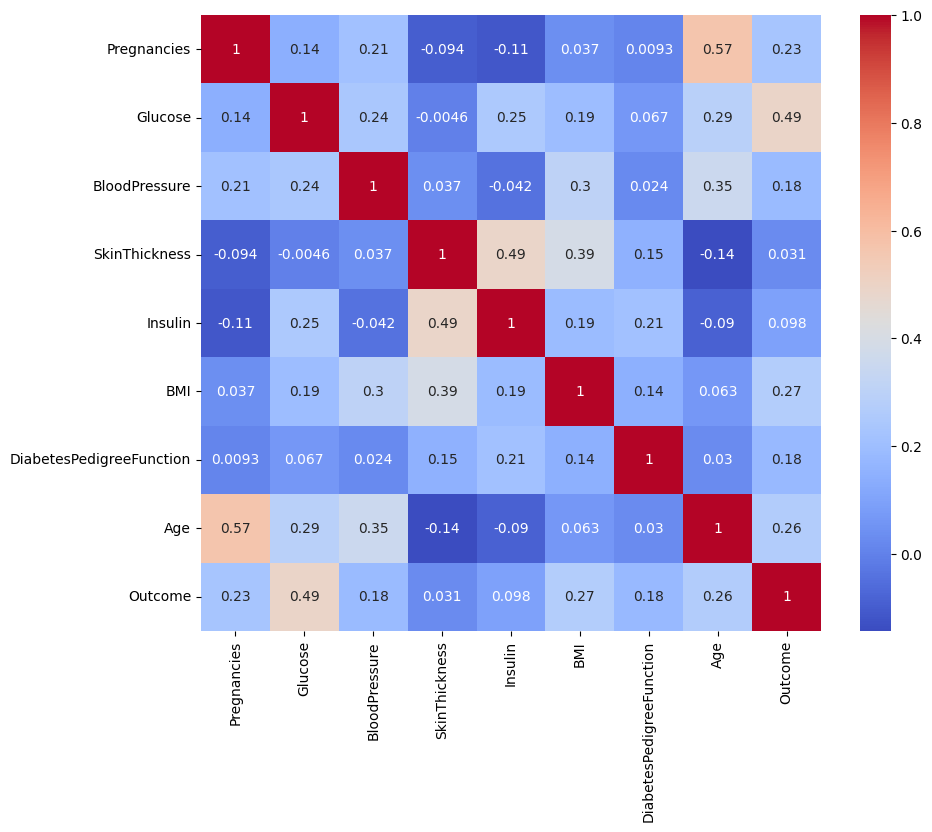

In [299]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.

Las variables independientes que tienen correlación más fuerte con la variable dependiente son:

- Glucose: 0.49
- BMI: 0.27
- Age: 0.26
- Pregnancies: 0.23


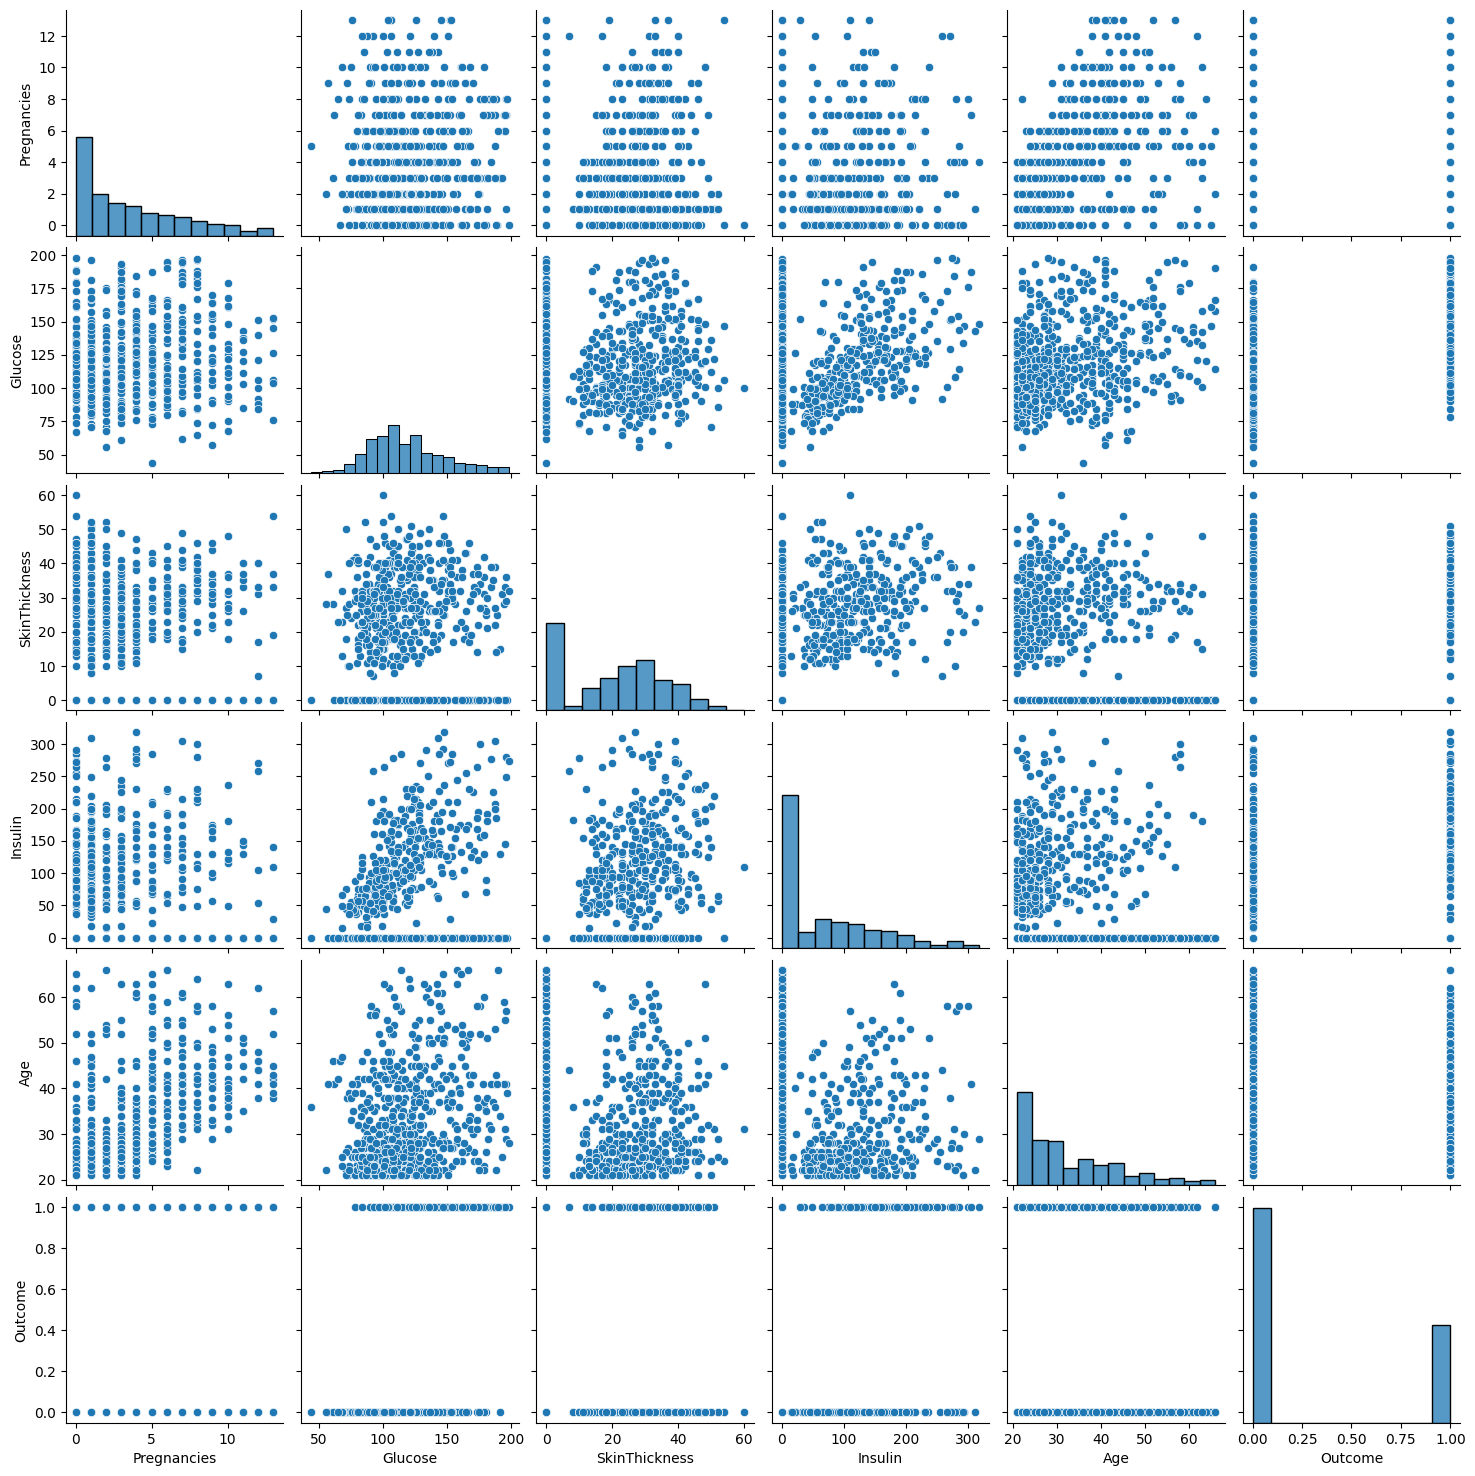

In [300]:
# Distribución por pares de variables (usando un pairplot)

# Se filtra las variables que tienen una correlación alta
threshold = 0.4
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Se selecciona solo las columnas con alta correlación
correlated_vars = high_corr_pairs.dropna(how='all', axis=1).columns

# Se genera el pairplot solo para las variables con correlación significativa
sns.pairplot(df[correlated_vars]) # Muestra gráficos de dispersión y distribuciones univariadas para todas las variables numéricas

## Pre-procesamiento

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

X = df.drop(["Outcome"], axis=1) # Features
y = df["Outcome"] # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=[int, float]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

## Entrenamiento

In [302]:
# LAZY PREDICT

# Crear el objeto LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar los modelos
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Mostrar los resultados
print(models)

100%|██████████| 31/31 [00:00<00:00, 43.37it/s]

[LightGBM] [Info] Number of positive: 164, number of negative: 347
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 511, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320939 -> initscore=-0.749458
[LightGBM] [Info] Start training from score -0.749458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Luego del resultado del Lazy Predict se decide avanzar con los modelos de XGBClassifier y Random Forest

### Random Forest

In [303]:
# Crear un Pipeline para el modelo Random Forest (clasificación)
pipeline_rf_c = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('rf_c', RandomForestClassifier(
        random_state=42,       # Semilla para resultados reproducibles
        n_estimators=100,      # Número de árboles en el bosque
        criterion='gini',      # Criterio para dividir los nodos
        max_depth=20,          # Profundidad máxima de los árboles
        min_samples_split=5,   # Mínimo número de muestras para dividir un nodo
        min_samples_leaf=2     # Mínimo número de muestras en una hoja
    ))
])

# Ajustar el Pipeline con los datos de entrenamiento
pipeline_rf_c.fit(X_train, y_train)

# Hacer predicciones utilizando el modelo
y_pred_rf_c = pipeline_rf_c.predict(X_test)
y_prob_rf_c = pipeline_rf_c.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva


# Evaluar el modelo de Random Forest (clasificación)
accuracy_rf_c = accuracy_score(y_test, y_pred_rf_c)
metrics_rf_c = classification_report(y_test, y_pred_rf_c)
conf_matrix_rf_c = confusion_matrix(y_test, y_pred_rf_c)

# Mostrar resultados
print(f'Exactitud (Random Forest Clasificación): {accuracy_rf_c}')
print('Informe de Clasificación:')
print(metrics_rf_c)
print('Matriz de Confusión:')
print(conf_matrix_rf_c)

Exactitud (Random Forest Clasificación): 0.8125
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        92
           1       0.73      0.53      0.61        36

    accuracy                           0.81       128
   macro avg       0.78      0.73      0.74       128
weighted avg       0.80      0.81      0.80       128

Matriz de Confusión:
[[85  7]
 [17 19]]


Se tiene un accuracy bueno de 0.81. Pero el modelo es mejor para identificar los casos de personas sin diabetes, y no tanto para identificar las personas con diabetes.

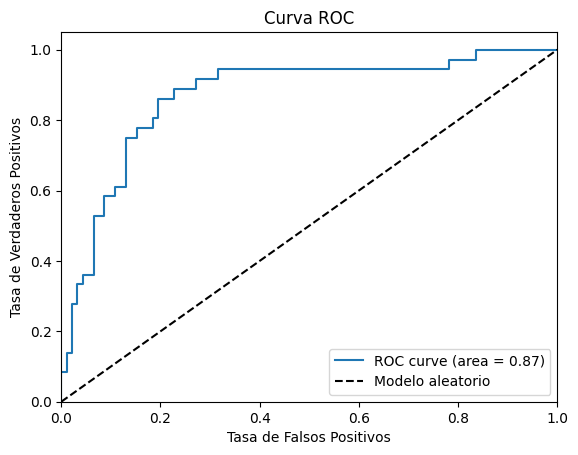

In [304]:
# Generar la curva ROC y calcular el AUC para clasificaciones binarias
# Paso 1: Identificar las clases únicas en y_test
clases_unicas = list(set(y_test))

# Paso 2: Asegurarse de que y_test tenga exactamente dos clases
if len(clases_unicas) != 2:
    raise ValueError("y_test debe contener exactamente dos clases para calcular la curva ROC.")

# Paso 3: Definir la clase positiva
# Por convención, tomamos la segunda clase en el orden como positiva
pos_label = clases_unicas[1]

# Paso 4: Convertir y_test a valores binarios (0 y 1)
y_test_binario = [1 if valor == pos_label else 0 for valor in y_test]

# Paso 5: Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_binario, y_prob_rf_c)
auc_rf = roc_auc_score(y_test_binario, y_prob_rf_c)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Modelo aleatorio")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo es muy bueno para distinguir las clases positivas de las negativas

### XGBClassifier

In [305]:
# Crear un pipeline que incluye el preprocesador y el modelo XGBOOST
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('model', xgb.XGBClassifier())
])

# Ajustar el modelo al conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones con el modelo en el conjunto de prueba
y_pred = pipeline.predict(X_test)  # Predicciones binarias (0/1)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

# Mostrar métricas detalladas del modelo
metrics = classification_report(y_test, y_pred) 
print('Informe de Clasificación:')
print(metrics)

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Exactitud: 0.8125
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        92
           1       0.65      0.72      0.68        36

    accuracy                           0.81       128
   macro avg       0.77      0.79      0.78       128
weighted avg       0.82      0.81      0.82       128

Matriz de Confusión:
[[78 14]
 [10 26]]


Este modelo tiene un accuracy bueno, y también identifica mejor los casos de personas sin diabetes que los casos con diabetes.

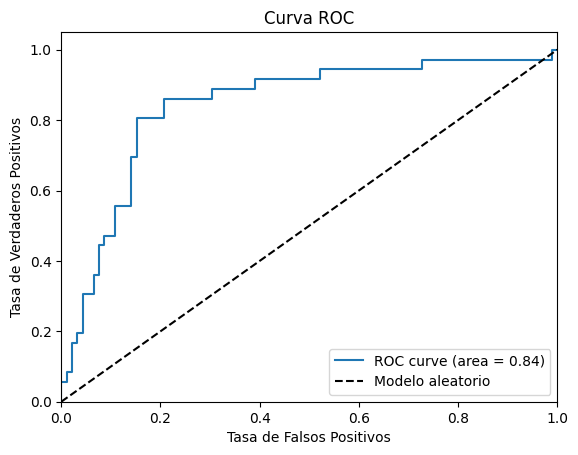

In [306]:
# Generar la curva ROC y calcular el AUC para clasificaciones binarias
# Paso 1: Identificar las clases únicas en y_test
clases_unicas = list(set(y_test))

# Paso 2: Asegurarse de que y_test tenga exactamente dos clases
if len(clases_unicas) != 2:
    raise ValueError("y_test debe contener exactamente dos clases para calcular la curva ROC.")

# Paso 3: Definir la clase positiva
# Por convención, tomamos la segunda clase en el orden como positiva
pos_label = clases_unicas[1]

# Paso 4: Convertir y_test a valores binarios (0 y 1)
y_test_binario = [1 if valor == pos_label else 0 for valor in y_test]

# Paso 5: Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_binario, y_prob)
auc_xgb = roc_auc_score(y_test_binario, y_prob)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Modelo aleatorio")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Este modelo es muy bueno también para distinguir los postivos de los negativos.

### Comparision Models

In [307]:
# COMPARAR TIEMPO DE ENTRENAMIENTO

import time

# Función para medir el tiempo de entrenamiento
def measure_training_time(pipeline, X_train, y_train):
    start_time = time.perf_counter()
    pipeline.fit(X_train, y_train)
    end_time = time.perf_counter()
    return end_time - start_time

# Medir el tiempo de entrenamiento para cada modelo
time_rf_c = measure_training_time(pipeline_rf_c, X_train, y_train)
time_xgb = measure_training_time(pipeline, X_train, y_train)

# Agregar el tiempo al DataFrame
results_org['Training Time (s)'] = [time_rf_c, time_xgb,]

# Imprimir los resultados con tiempo de entrenamiento
print(results_org)

           Model  Precision  \
0            XGB       0.81   
1  Random Forest       0.81   

                                            Metricas           Conf_Matrix  \
0                precision    recall  f1-score   ...  [[78, 14], [10, 26]]   
1                precision    recall  f1-score   ...   [[85, 7], [17, 19]]   

   AUC  Time  Training Time (s)  
0 0.84  0.29               0.15  
1 0.87  0.11               0.31  


In [308]:
# ORGANIZACION DE RESULTADOS

# Crear un DataFrame para almacenar los resultados
results_org = pd.DataFrame({
    'Model': ['XGB', 'Random Forest'],
    'Precision': [accuracy, accuracy_rf_c],
    'Metricas': [metrics, metrics_rf_c],
    'Conf_Matrix': [conf_matrix, conf_matrix_rf_c],
    'AUC': [auc_xgb, auc_rf],
    'Time': [time_xgb, time_rf_c]
})

# Imprimir los resultados
print(results_org)

           Model  Precision  \
0            XGB       0.81   
1  Random Forest       0.81   

                                            Metricas           Conf_Matrix  \
0                precision    recall  f1-score   ...  [[78, 14], [10, 26]]   
1                precision    recall  f1-score   ...   [[85, 7], [17, 19]]   

   AUC  Time  
0 0.84  0.31  
1 0.87  0.15  


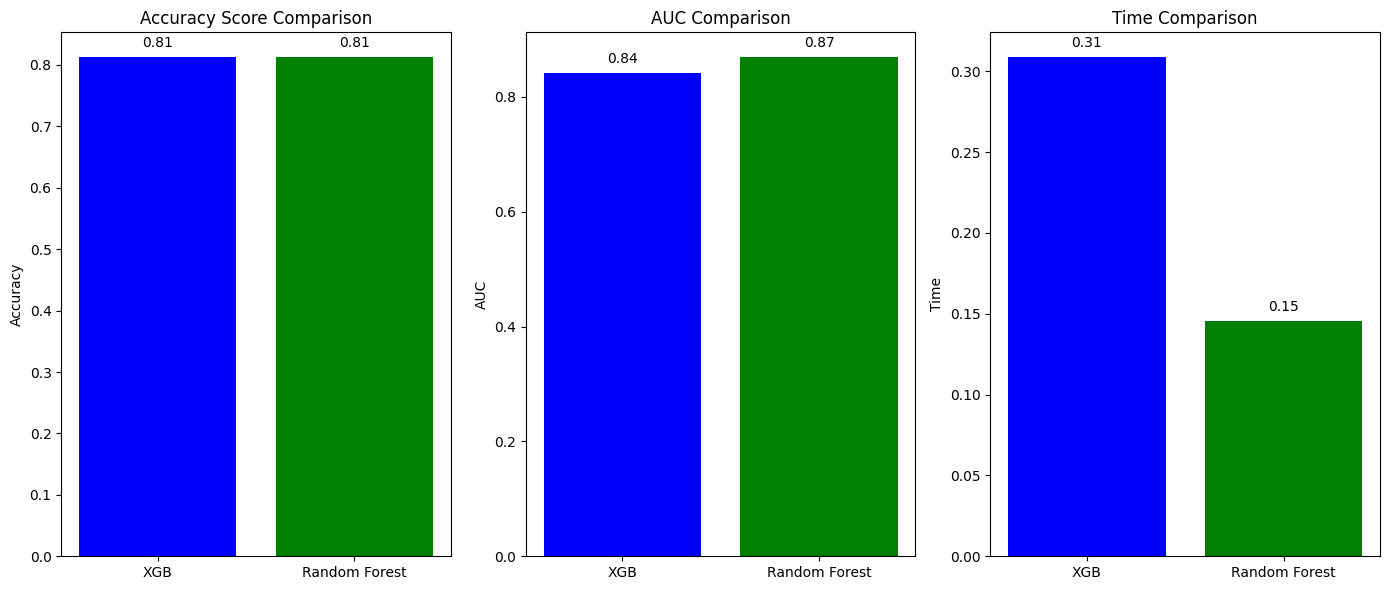

In [309]:
# GRAFICAR LOS RESULTADOS

import matplotlib.pyplot as plt

# Graficar los resultados
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Función para agregar etiquetas de datos encima de las barras
def add_labels(ax, values):
    for i, value in enumerate(values):
        ax.annotate(f'{value:.2f}',  # Formato del valor
                    xy=(i, value),  # Coordenadas del texto
                    xytext=(0, 5),  # Desplazamiento en píxeles
                    textcoords='offset points',
                    ha='center', va='bottom')  # Alineación

# Gráfico de Accuracy
accuracy = results_org['Precision']
ax[0].bar(results_org['Model'], accuracy, color=['blue', 'green', 'red', 'yellow'])
ax[0].set_title('Accuracy Score Comparison')
ax[0].set_ylabel('Accuracy')
add_labels(ax[0], accuracy)

# Gráfico de AUC
auc = results_org['AUC']
ax[1].bar(results_org['Model'], auc, color=['blue', 'green', 'red', 'yellow'])
ax[1].set_title('AUC Comparison')
ax[1].set_ylabel('AUC')
add_labels(ax[1], auc)

# Gráfico de Time
time = results_org['Time']
ax[2].bar(results_org['Model'], time, color=['blue', 'green', 'red', 'yellow'])
ax[2].set_title('Time Comparison')
ax[2].set_ylabel('Time')
add_labels(ax[2], time)

plt.tight_layout()
plt.show()

Ambos modelos tienen un accuracy de 0.81, tienen un rendimiento igual, pero el random forest distingue mejor los casos negativos de los positivos y obtiene el resultado bastante más rápido que el XGB. Se procede a continuación a optimizar ambos modelos para compararlos mejor y decidir finalmente cual es que se utilizará.

## Entrenamiento ajustando hiperparametros

### Random Forest con Grid Search

In [310]:
# RANDOM FOREST Con Grid Search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los parámetros a buscar para el modelo Random Forest (clasificación)
param_grid_rf_c = {
    'rf_c__n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'rf_c__criterion': ['gini', 'entropy'],  # Criterio para dividir los nodos
    'rf_c__max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'rf_c__min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'rf_c__min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'rf_c__random_state': [42]  # Estado aleatorio para la reproducibilidad
}

# Crear un Pipeline para el modelo Random Forest (clasificación)
pipeline_rf_c = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('rf_c', RandomForestClassifier(random_state=42))  # Clasificador RandomForest
])

# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search_rf_c = GridSearchCV(estimator=pipeline_rf_c, param_grid=param_grid_rf_c, 
                                cv=5, n_jobs=-1, verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_rf_c.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (Random Forest Clasificación): {grid_search_rf_c.best_params_}")

# Obtener el mejor modelo de Random Forest
best_model_rf_c = grid_search_rf_c.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_rf_c = best_model_rf_c.predict(X_test)

# Evaluar el modelo de Random Forest (clasificación)
accuracy_rf_c = accuracy_score(y_test, y_pred_rf_c)
metrics_rf_c = classification_report(y_test, y_pred_rf_c)
conf_matrix_rf_c = confusion_matrix(y_test, y_pred_rf_c)

# Mostrar resultados
print(f'Exactitud (Random Forest Clasificación): {accuracy_rf_c}')
print('Informe de Clasificación:')
print(metrics_rf_c)
print('Matriz de Confusión:')
print(conf_matrix_rf_c)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros (Random Forest Clasificación): {'rf_c__criterion': 'entropy', 'rf_c__max_depth': 10, 'rf_c__min_samples_leaf': 2, 'rf_c__min_samples_split': 10, 'rf_c__n_estimators': 100, 'rf_c__random_state': 42}
Exactitud (Random Forest Clasificación): 0.8359375
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        92
           1       0.78      0.58      0.67        36

    accuracy                           0.84       128
   macro avg       0.81      0.76      0.78       128
weighted avg       0.83      0.84      0.83       128

Matriz de Confusión:
[[86  6]
 [15 21]]


Mejora el accuracy y también la capacidad para predecir mejor los casos positivos y negativos

<!-- Mejora el accuracy y también la capacidad para identificar mejor los casos positivos y negativos. -->

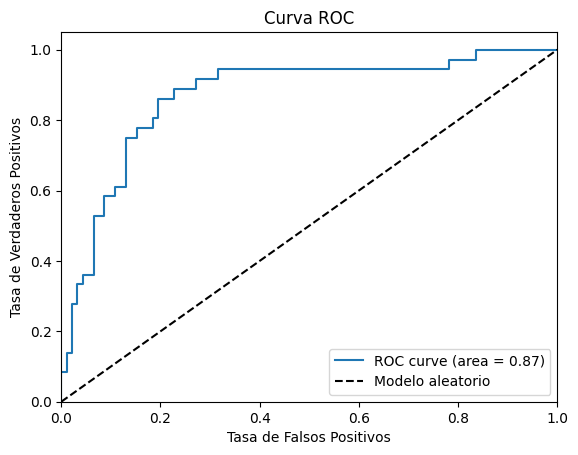

In [311]:
# Generar la curva ROC y calcular el AUC para clasificaciones binarias
# Paso 1: Identificar las clases únicas en y_test
clases_unicas = list(set(y_test))

# Paso 2: Asegurarse de que y_test tenga exactamente dos clases
if len(clases_unicas) != 2:
    raise ValueError("y_test debe contener exactamente dos clases para calcular la curva ROC.")

# Paso 3: Definir la clase positiva
# Por convención, tomamos la segunda clase en el orden como positiva
pos_label = clases_unicas[1]

# Paso 4: Convertir y_test a valores binarios (0 y 1)
y_test_binario = [1 if valor == pos_label else 0 for valor in y_test]

# Paso 5: Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_binario, y_prob_rf_c)
auc_rf = roc_auc_score(y_test_binario, y_prob_rf_c)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Modelo aleatorio")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

La curva ROC sigue siendo muy buena.

### XGBClassfifier con Grid Search

In [312]:
# XGBOOST con Grid Search, para REGRESION y CLASIFICACION

# Crear un pipeline que incluye el preprocesador y el modelo XGBOOST
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('model', xgb.XGBClassifier())
])

# Ajustar el modelo al conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones con el modelo en el conjunto de prueba
y_pred = pipeline.predict(X_test)  # Predicciones binarias (0/1)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

# Mostrar métricas detalladas del modelo
metrics = classification_report(y_test, y_pred) 
print('Informe de Clasificación:')
print(metrics)

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Exactitud: 0.8125
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        92
           1       0.65      0.72      0.68        36

    accuracy                           0.81       128
   macro avg       0.77      0.79      0.78       128
weighted avg       0.82      0.81      0.82       128

Matriz de Confusión:
[[78 14]
 [10 26]]


Mejora levemente el accuracy y las demas metricas.

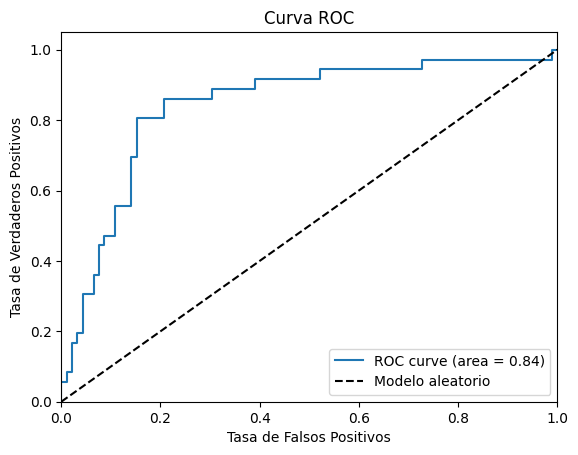

In [313]:
# Generar la curva ROC y calcular el AUC para clasificaciones binarias
# Paso 1: Identificar las clases únicas en y_test
clases_unicas = list(set(y_test))

# Paso 2: Asegurarse de que y_test tenga exactamente dos clases
if len(clases_unicas) != 2:
    raise ValueError("y_test debe contener exactamente dos clases para calcular la curva ROC.")

# Paso 3: Definir la clase positiva
# Por convención, tomamos la segunda clase en el orden como positiva
pos_label = clases_unicas[1]

# Paso 4: Convertir y_test a valores binarios (0 y 1)
y_test_binario = [1 if valor == pos_label else 0 for valor in y_test]

# Paso 5: Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test_binario, y_prob)
auc_xgb = roc_auc_score(y_test_binario, y_prob)

# Paso 6: Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Modelo aleatorio")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

La curva ROC sigue siendo muy buena.

### Comparision of Optimized Models

In [314]:
# COMPARAR TIEMPO DE ENTRENAMIENTO

import time

# Función para medir el tiempo de entrenamiento
def measure_training_time(pipeline, X_train, y_train):
    start_time = time.perf_counter()
    pipeline.fit(X_train, y_train)
    end_time = time.perf_counter()
    return end_time - start_time

# Medir el tiempo de entrenamiento para cada modelo
time_rf_c = measure_training_time(pipeline_rf_c, X_train, y_train)
time_xgb = measure_training_time(pipeline, X_train, y_train)

# Agregar el tiempo al DataFrame
results_org['Training Time (s)'] = [time_rf_c, time_xgb,]

# Imprimir los resultados con tiempo de entrenamiento
print(results_org)

           Model  Precision  \
0            XGB       0.81   
1  Random Forest       0.81   

                                            Metricas           Conf_Matrix  \
0                precision    recall  f1-score   ...  [[78, 14], [10, 26]]   
1                precision    recall  f1-score   ...   [[85, 7], [17, 19]]   

   AUC  Time  Training Time (s)  
0 0.84  0.31               0.11  
1 0.87  0.15               0.39  


In [315]:
# ORGANIZACION DE RESULTADOS

# Crear un DataFrame para almacenar los resultados
results_org = pd.DataFrame({
    'Model': ['XGB', 'Random Forest'],
    'Precision': [accuracy, accuracy_rf_c],
    'Metricas': [metrics, metrics_rf_c],
    'Conf_Matrix': [conf_matrix, conf_matrix_rf_c],
    'AUC': [auc_xgb, auc_rf],
    'Time': [time_xgb, time_rf_c]
})

# Imprimir los resultados
print(results_org)

           Model  Precision  \
0            XGB       0.81   
1  Random Forest       0.84   

                                            Metricas           Conf_Matrix  \
0                precision    recall  f1-score   ...  [[78, 14], [10, 26]]   
1                precision    recall  f1-score   ...   [[86, 6], [15, 21]]   

   AUC  Time  
0 0.84  0.39  
1 0.87  0.11  


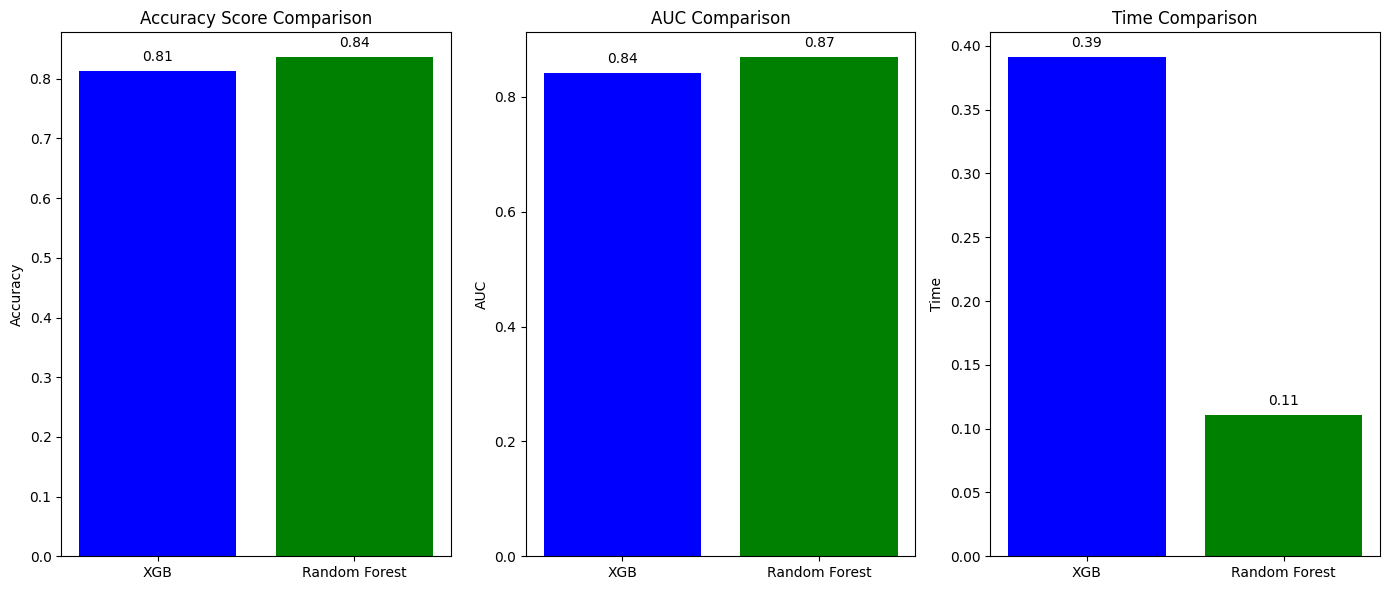

In [316]:
# GRAFICAR LOS RESULTADOS

import matplotlib.pyplot as plt

# Graficar los resultados
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Función para agregar etiquetas de datos encima de las barras
def add_labels(ax, values):
    for i, value in enumerate(values):
        ax.annotate(f'{value:.2f}',  # Formato del valor
                    xy=(i, value),  # Coordenadas del texto
                    xytext=(0, 5),  # Desplazamiento en píxeles
                    textcoords='offset points',
                    ha='center', va='bottom')  # Alineación

# Gráfico de Accuracy
accuracy = results_org['Precision']
ax[0].bar(results_org['Model'], accuracy, color=['blue', 'green', 'red', 'yellow'])
ax[0].set_title('Accuracy Score Comparison')
ax[0].set_ylabel('Accuracy')
add_labels(ax[0], accuracy)

# Gráfico de AUC
auc = results_org['AUC']
ax[1].bar(results_org['Model'], auc, color=['blue', 'green', 'red', 'yellow'])
ax[1].set_title('AUC Comparison')
ax[1].set_ylabel('AUC')
add_labels(ax[1], auc)

# Gráfico de Time
time = results_org['Time']
ax[2].bar(results_org['Model'], time, color=['blue', 'green', 'red', 'yellow'])
ax[2].set_title('Time Comparison')
ax[2].set_ylabel('Time')
add_labels(ax[2], time)

plt.tight_layout()
plt.show()

## CONCLUSION

El Random Forest mejoró el accuracy, y sigue distinguiendo mejor los casos positivos de los negativos y es bastante más rapido por lo que se decide trabajar de ahora en más con este modelo para estas predicciones.